In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
podatki = pd.read_csv("podatkovni_set/heart_2020.csv")

#SPREMINJANJE yes/no
podatki["HeartDisease"] = podatki["HeartDisease"].replace("Yes", "Ja")
podatki["HeartDisease"] = podatki["HeartDisease"].replace("No", "Ne")
podatki["PhysicalActivity"] = podatki["PhysicalActivity"].replace("Yes", "Ja")
podatki["PhysicalActivity"] = podatki["PhysicalActivity"].replace("No", "Ne")
podatki["AlcoholDrinking"] = podatki["AlcoholDrinking"].replace("Yes", "Ja")
podatki["AlcoholDrinking"] = podatki["AlcoholDrinking"].replace("No", "Ne")

podatki["Race"] = podatki["Race"].replace("White", "Belopolti")
podatki["Race"] = podatki["Race"].replace("Asian", "Azijci")
podatki["Race"] = podatki["Race"].replace("American Indian/Alaskan Native", "Ameriški Indijanci/Aljaški Domorodci")
podatki["Race"] = podatki["Race"].replace("Hispanic", "Latinski Američani")
podatki["Race"] = podatki["Race"].replace("Black", "Temnopolti")
podatki["Race"] = podatki["Race"].replace("Other", "Drugo")

#Poslovenjenje starostnih kategorij
podatki["AgeCategory"] = podatki["AgeCategory"].replace("80 or older", "80+")


podatki.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Ne,16.60,Yes,Ne,No,3.0,30.0,No,Female,55-59,Belopolti,Yes,Ja,Very good,5.0,Yes,No,Yes
1,Ne,20.34,No,Ne,Yes,0.0,0.0,No,Female,80+,Belopolti,No,Ja,Very good,7.0,No,No,No
2,Ne,26.58,Yes,Ne,No,20.0,30.0,No,Male,65-69,Belopolti,Yes,Ja,Fair,8.0,Yes,No,No
3,Ne,24.21,No,Ne,No,0.0,0.0,No,Female,75-79,Belopolti,No,Ne,Good,6.0,No,No,Yes
4,Ne,23.71,No,Ne,No,28.0,0.0,Yes,Female,40-44,Belopolti,No,Ja,Very good,8.0,No,No,No


In [3]:
missing_values = podatki.isnull().sum() #Preverimo, če obstajajo manjkajoče vrednosti

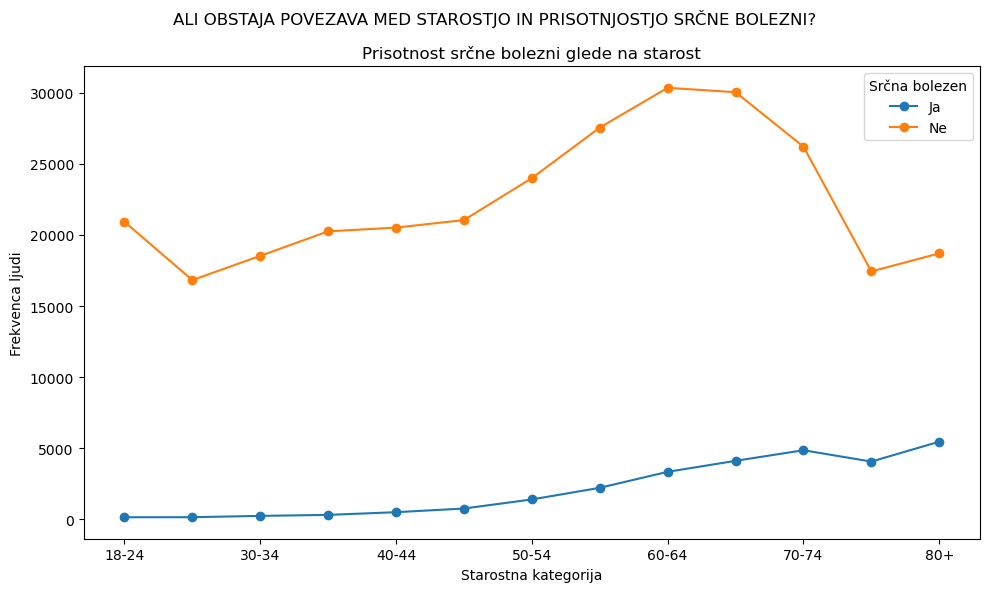

In [4]:
# Nalaganje podatkov
starost_bolezen = podatki.groupby(['AgeCategory', 'HeartDisease']).size().unstack()

# Ustvarjanje plota
fig, ax = plt.subplots(figsize=(10, 6))

# Definiranje črtnega grafa
starost_bolezen.plot(kind='line', ax=ax, marker='o')

# Nastavljene oznake
ax.set(title="Prisotnost srčne bolezni glede na starost",
       xlabel="Starostna kategorija",
       ylabel="Frekvenca ljudi")

# Poslovenjena legenda
ax.legend(title="Srčna bolezen")

# Glavni nalsov
fig.suptitle("ALI OBSTAJA POVEZAVA MED STAROSTJO IN PRISOTNJOSTJO SRČNE BOLEZNI?")

# Izris grafa
plt.tight_layout()
plt.show()


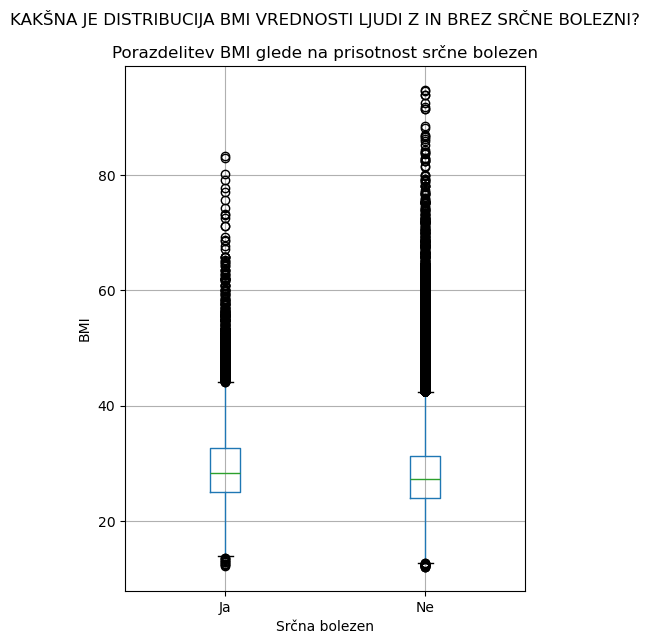

In [10]:
#Škatla z brki - OO metoda
#Ustvarjen okvir -plot
#plt.set_cmap("winter")
fig, ax = plt.subplots(figsize=(5, 7))

#Nalaganje podatkov
podatki.boxplot(column='BMI', by='HeartDisease', ax=ax)

#Nastavljeni naslovi
ax.set(title="Porazdelitev BMI glede na prisotnost srčne bolezen",
      xlabel="Srčna bolezen",
      ylabel="BMI")

#Odstranjen glavni naslov figure
fig.suptitle("KAKŠNA JE DISTRIBUCIJA BMI VREDNOSTI LJUDI Z IN BREZ SRČNE BOLEZNI?")

#Izris grafa
plt.show()

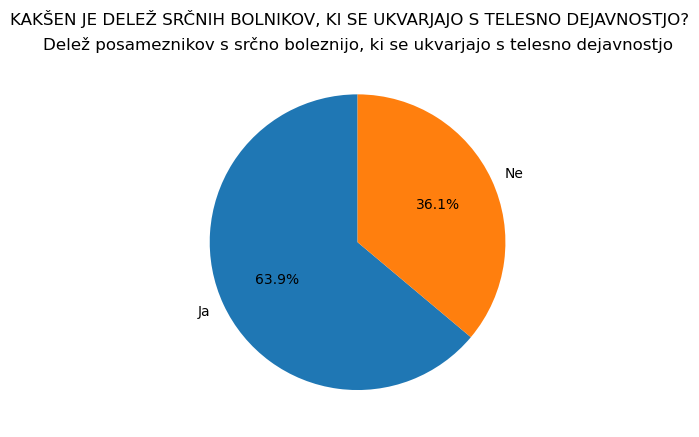

In [11]:
# Ustvarimo prazen graf
fig, ax = plt.subplots()

# Izračunamo število posameznikov s srčno boleznijo, ki se ukvarjajo s telesno dejavnostjo
physical_activity_counts = podatki[podatki['HeartDisease'] == 'Ja']['PhysicalActivity'].value_counts()

# Narišemo tortni diagram
ax.pie(physical_activity_counts, labels=physical_activity_counts.index, autopct='%1.1f%%', startangle=90)

# Dodamo naslov
ax.set_title('Delež posameznikov s srčno boleznijo, ki se ukvarjajo s telesno dejavnostjo')
plt.suptitle("KAKŠEN JE DELEŽ SRČNIH BOLNIKOV, KI SE UKVARJAJO S TELESNO DEJAVNOSTJO?")

# Prikažemo graf
plt.show()

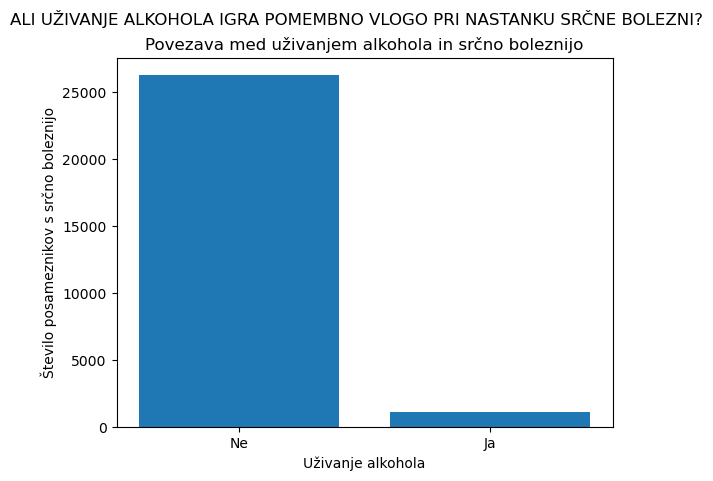

In [6]:
# Ustvarimo prazen graf
fig, ax = plt.subplots()

# Izračunamo število posameznikov s srčno boleznijo, ki pijejo in ne pijejo alkohola
alcohol_counts = podatki[podatki['HeartDisease'] == 'Ja']['AlcoholDrinking'].value_counts()

# Narišemo stolpčni diagram
ax.bar(alcohol_counts.index, alcohol_counts.values)

# Dodamo oznake in naslov
ax.set_xlabel('Uživanje alkohola')
ax.set_ylabel('Število posameznikov s srčno boleznijo')
ax.set_title('Povezava med uživanjem alkohola in srčno boleznijo')
plt.suptitle("ALI UŽIVANJE ALKOHOLA IGRA POMEMBNO VLOGO PRI NASTANKU SRČNE BOLEZNI?")

# Prikažemo graf
plt.show()

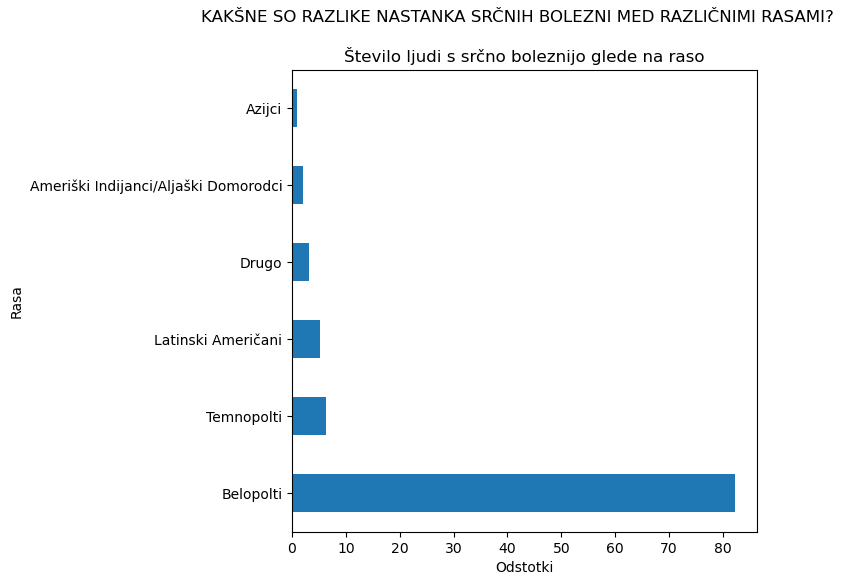

In [7]:
# Zbiranje podatkov
racial_counts = podatki[podatki['HeartDisease'] == 'Ja']['Race'].value_counts(normalize=True) * 100

# Nastavitev prikaza
plt.figure(figsize=(6, 6))

# Določitev grafa
racial_counts.plot(kind='barh')

#Nastavljanje oznak
plt.xlabel('Odstotki')
plt.ylabel('Rasa')
plt.title("Število ljudi s srčno boleznijo glede na raso")
plt.suptitle("KAKŠNE SO RAZLIKE NASTANKA SRČNIH BOLEZNI MED RAZLIČNIMI RASAMI?")

#Izris grafa
plt.show()

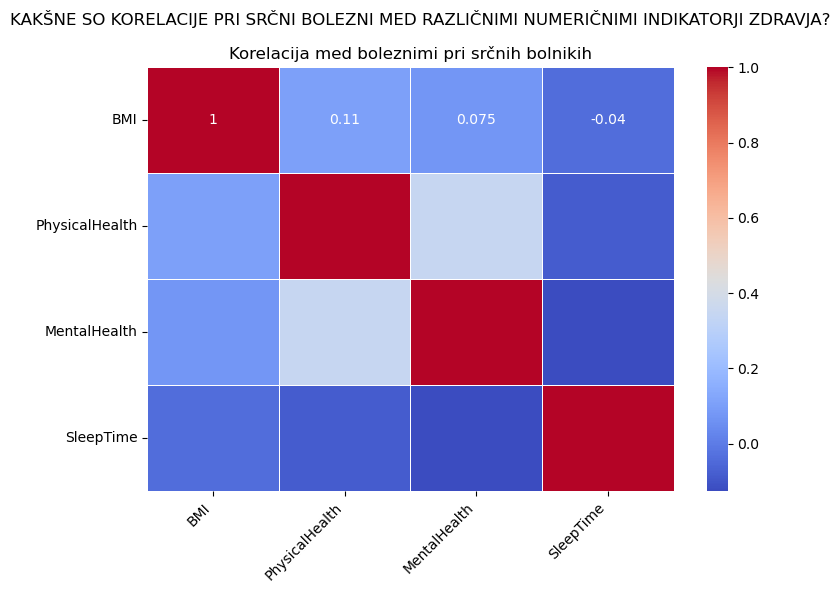

In [8]:
import seaborn as sns

# Izločitev samo srčnih bolnikov
pod = podatki[podatki['HeartDisease'] == 'Ja']

# Izbira numeričnih podatkov za korelacijo
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Računanje korelacijske matrike numeričnih podatkov
corr_matrix = pod[numerical_cols].corr()

# Nastavitev plota
fig, ax = plt.subplots(figsize=(8, 6))

# Generiranje Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# Nastavljanje oznak in nastavitev
ax.set_title('Korelacija med boleznimi pri srčnih bolnikih')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.suptitle("KAKŠNE SO KORELACIJE PRI SRČNI BOLEZNI MED RAZLIČNIMI NUMERIČNIMI INDIKATORJI ZDRAVJA?")

# Nastavljanje layouta, da bi se izognili prekrivanju
plt.tight_layout()

#Izris grafa
plt.show()